# Getting started with D-Wave Leap

- Go to https://cloud.dwavesys.com/leap/ and create an account
- Follow the instructions on https://docs.ocean.dwavesys.com/

In [1]:
# Create a D-Wave sampler instance
from dwave.system.samplers import DWaveSampler
sampler = DWaveSampler()

# Simple examples
Sample 100 times: $E_\mathrm{ising}(\mathbf{s})= -1s_0 + 1s_1$

In [2]:
res=sampler.sample_ising({0: -1, 1: 1}, {}, num_reads=100)
list(res.data())

[Sample(sample={0: 1, 1: -1}, energy=-2.0, num_occurrences=100)]

Sample 100 times: $E_\mathrm{ising}(\mathbf{s})= -1s_0 +1s_1 + 0s_2$

In [4]:
res=sampler.sample_ising({0: -1, 1: 1, 2: 0}, {}, num_reads=100)
list(res.data())

[Sample(sample={0: 1, 1: -1, 2: -1}, energy=-2.0, num_occurrences=49),
 Sample(sample={0: 1, 1: -1, 2: 1}, energy=-2.0, num_occurrences=51)]

Sample 100 times: $E_\mathrm{ising}(\mathbf{s})= -s_0 s_4$

In [8]:
res=sampler.sample_ising({}, {(0,4): -1}, num_reads=100)
list(res.data())

[Sample(sample={0: -1, 4: -1}, energy=-1.0, num_occurrences=51),
 Sample(sample={0: 1, 4: 1}, energy=-1.0, num_occurrences=49)]

Sample 100 times: $E_\mathrm{ising}(\mathbf{s})= s_0 -s_0 s_4$

In [9]:
res=sampler.sample_ising({0: 1}, {(0,4): -1}, num_reads=100)
list(res.data())

[Sample(sample={0: -1, 4: -1}, energy=-2.0, num_occurrences=100)]

# Sampling distribution
How do the samples distribute over their energies?

Create an uniform eigenspectrum of $2^8 = 256$ eigenvalues using 8 qubits assigning qubit biases $\mathbf{h}$ as $h_i=2^{1-i}$, $i=0...7$

The physical range of each $h_i$ is [-2,+2].

In [3]:
hs = {i: 2**(1-i) for i in range(8)}
hs

{0: 2, 1: 1, 2: 0.5, 3: 0.25, 4: 0.125, 5: 0.0625, 6: 0.03125, 7: 0.015625}

Sample 10000 times: $E_\mathrm{ising}(\mathbf{s})= \sum_{i=0}^72^{1-i}s_i$

In [4]:
res=sampler.sample_ising(hs, {}, num_reads=10000)
list(res.data())

[Sample(sample={0: -1, 1: -1, 2: -1, 3: -1, 4: -1, 5: -1, 6: -1, 7: -1}, energy=-3.984375, num_occurrences=2349),
 Sample(sample={0: -1, 1: -1, 2: -1, 3: -1, 4: -1, 5: -1, 6: -1, 7: 1}, energy=-3.953125, num_occurrences=2729),
 Sample(sample={0: -1, 1: -1, 2: -1, 3: -1, 4: -1, 5: -1, 6: 1, 7: -1}, energy=-3.921875, num_occurrences=1191),
 Sample(sample={0: -1, 1: -1, 2: -1, 3: -1, 4: -1, 5: -1, 6: 1, 7: 1}, energy=-3.890625, num_occurrences=1273),
 Sample(sample={0: -1, 1: -1, 2: -1, 3: -1, 4: -1, 5: 1, 6: -1, 7: -1}, energy=-3.859375, num_occurrences=513),
 Sample(sample={0: -1, 1: -1, 2: -1, 3: -1, 4: -1, 5: 1, 6: -1, 7: 1}, energy=-3.828125, num_occurrences=583),
 Sample(sample={0: -1, 1: -1, 2: -1, 3: -1, 4: -1, 5: 1, 6: 1, 7: -1}, energy=-3.796875, num_occurrences=253),
 Sample(sample={0: -1, 1: -1, 2: -1, 3: -1, 4: -1, 5: 1, 6: 1, 7: 1}, energy=-3.765625, num_occurrences=271),
 Sample(sample={0: -1, 1: -1, 2: -1, 3: -1, 4: 1, 5: -1, 6: -1, 7: -1}, energy=-3.734375, num_occurrence

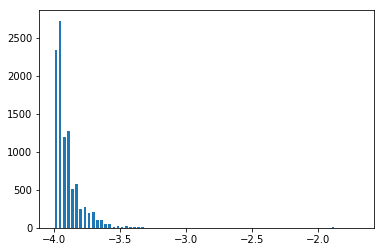

In [6]:
# Plot sample frequency vs energy
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(res.record['energy'], res.record['num_occurrences'], 0.02)
plt.show()

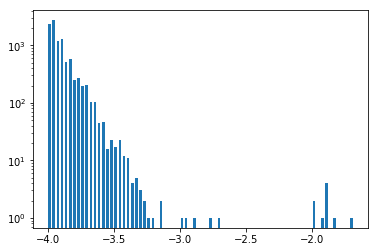

In [7]:
# Plot sample frequency vs energy (log scale)
plt.bar(res.record['energy'], res.record['num_occurrences'], 0.02, log=True)
plt.show()

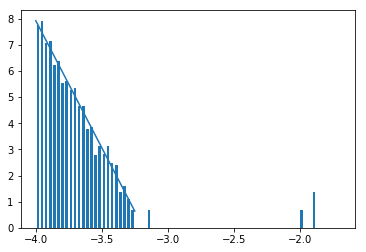

In [8]:
# Perform linear regression to find slope
import numpy as np
from scipy import stats
threshold = -3.25
n = np.count_nonzero(res.record['energy'] < threshold)
lr = stats.linregress(res.record['energy'][:n], np.log(res.record['num_occurrences'][:n]))
plt.bar(res.record['energy'], np.log(res.record['num_occurrences']), 0.02)
plt.plot((-4, threshold), (lr.intercept - lr.slope*4, lr.intercept + lr.slope*threshold))
plt.show()

Boltzmann distribution: $F(\mathbf{s})\propto e^{-\frac{E(\mathbf{s})}{kT}}$

$\frac{F(\mathbf{s})}{F(\mathbf{s^\prime})} = e^{-\frac{E(\mathbf{s})-E(\mathbf{s^\prime})}{kT}}
\Leftrightarrow \log F(\mathbf{s}) - \log F(\mathbf{s^\prime}) = -\frac{E(\mathbf{s})-E(\mathbf{s^\prime})}{kT}$

Since $E(\mathbf{s}) = \frac{B(1)}{2}E_\mathrm{ising}(\mathbf{s})$ :

$T=\frac{-B(1)}{2k\frac{\log F(\mathbf{s}) - \log F(\mathbf{s^\prime})}{E_\mathrm{ising}(\mathbf{s})-E_\mathrm{ising}(\mathbf{s^\prime})}} = \frac{-B(1)}{2k\cdot\mathrm{slope}}$

In [9]:
h = 6.626e-34 # Planck constant
k = 1.38e-23 # Boltzmann constant
B = 8e9 * h # B(1) energy at freezeout point
print("T =", -B / (2*k*lr.slope), "K") # T in kelvin

T = 0.0197731531639556 K


# 3-bit 2-SAT example on Ising model
* Clause 1: $s_A \rightarrow s_B$

  Penalize invalid combination $(s_A,s_B) = (+1,-1)$

  $C_1 = s_A - s_B - s_As_B$

| $s_A$ | $s_B$ | $C_1$ |
| ----- | ----- | ----- |
| -1 | -1 | -1 |
| -1 | +1 | -1 |
| +1 | -1 | +3 |
| +1 | +1 | -1 |

* Clause 2: $s_A$ and $s_C$ disagree

  Penalize invalid condition $s_A = s_C$
  
  $C_2 = s_As_C$
  
| $s_A$ | $s_C$ | $C_2$ |
| ----- | ----- | ----- |
| -1 | -1 | +1 |
| -1 | +1 | -1 |
| +1 | -1 | -1 |
| +1 | +1 | +1 |

* Clause 3: $s_B$ and $s_C$ agree

  Penalize invalid condition $s_B \neq s_C$
  
  $C_3 = -s_Bs_C$
  
| $s_B$ | $s_C$ | $C_2$ |
| ----- | ----- | ----- |
| -1 | -1 | -1 |
| -1 | +1 | +1 |
| +1 | -1 | +1 |
| +1 | +1 | -1 |

Total energy: $E_\mathrm{ising}(\mathbf{s}) = C_1 + C_2 + C_3 = s_A - s_B - s_As_B + s_As_C - s_Bs_C$

| $s_A$ | $s_B$ | $s_C$ | $C_1$ | $C_2$ | $C_3$ | $E_\mathrm{ising}$ |
| ----- | ----- | ----- | ----- | ----- | ----- | ------------------ |
| -1 | -1 | -1 | -1 | +1 | -1 | -1
| -1 | -1 | +1 | -1 | -1 | +1 | -1
| -1 | +1 | -1 | -1 | +1 | +1 | +1
| -1 | +1 | +1 | -1 | -1 | -1 | -3
| +1 | -1 | -1 | +3 | -1 | -1 | +1
| +1 | -1 | +1 | +3 | +1 | +1 | +5
| +1 | +1 | -1 | -1 | -1 | +1 | -1
| +1 | +1 | +1 | -1 | +1 | -1 | -1

The solution is $\arg \min_\mathbf{s} E_\mathrm{ising}(\mathbf{s}) = (-1,+1,+1)$

All three qubits couple between each other, so we would need a complete graph of 3 nodes ($K_3$). It is impossible to directly map a $K_3$ graph into the Chimera graph.
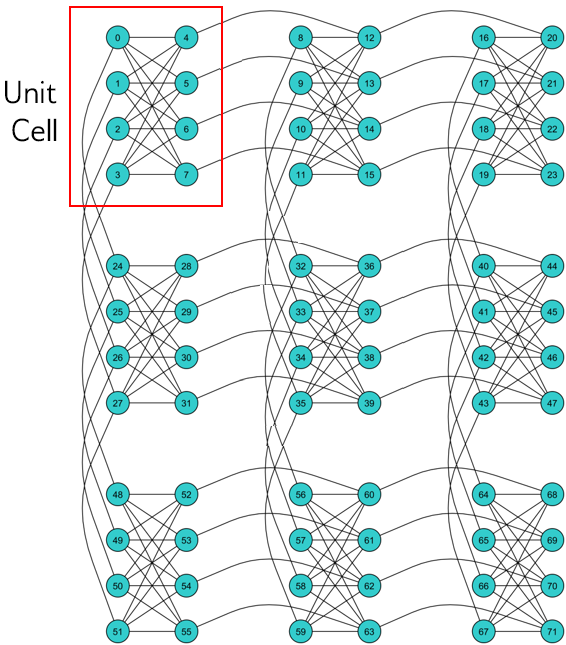

But we can map a square to four qubits (for example 0,4,1,5):
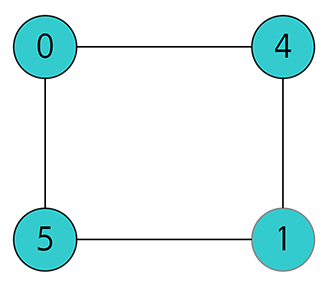

The $K_3$ graph is a *minor* of the square (and of the Chimera graph). This is called *minor embedding*. Now we can couple physical qubits 0 and 4 to represent a single logical qubit. Physical qubits 1 and 5 represent one logical qubit each. A possible map is:

| Logical qubit | Physical qubits |
|:---:|:---:|
| A | 0 and 4 |
| B | 1 |
| C | 5 |

To ensure that qubits 0 and 4 always have the value, we apply a ferromagnetic coupling between them, for example $J_{0,4} = -1$.

Logical qubits: $E_\mathrm{ising}(\mathbf{s}) = s_A - s_B - s_As_B + s_As_C - s_Bs_C$

Physical qubits: $E_\mathrm{ising}(\mathbf{s}) = s_0 - s_1 - s_4s_1 + s_0s_5 - s_1s_5 - s_0s_4$


Sample 100 times: $E_\mathrm{ising}(\mathbf{s}) = s_0 - s_1 - s_4s_1 + s_0s_5 - s_1s_5 - s_0s_4$

$h_0=+1,\; h_1=-1,\; J_{4,1}=-1,\; J_{0,5}=+1,\; J_{1,5}=-1,\; J_{0,4}=-1$

In [11]:
res=sampler.sample_ising({0: +1, 1: -1}, {(4,1): -1, (0,5): +1, (1,5): -1, (0,4): -1},
                         num_reads=100)
list(res.data())

[Sample(sample={0: -1, 1: 1, 4: 1, 5: 1}, energy=-4.0, num_occurrences=43),
 Sample(sample={0: -1, 1: 1, 4: -1, 5: 1}, energy=-4.0, num_occurrences=57)]

Sample 100 times: $E_\mathrm{ising}(\mathbf{s}) = s_0 - s_1 - s_4s_1 + s_0s_5 - s_1s_5 - 2s_0s_4$

$h_0=+1,\; h_1=-1,\; J_{4,1}=-1,\; J_{0,5}=+1,\; J_{1,5}=-1,\; J_{0,4}=-2$

In [13]:
res=sampler.sample_ising({0: +1, 1: -1}, {(4,1): -1, (0,5): +1, (1,5): -1, (0,4): -2}, num_reads=100)
list(res.data())

[Sample(sample={0: -1, 1: 1, 4: -1, 5: 1}, energy=-5.0, num_occurrences=100)]

# 3-bit 2-SAT example as a Constraint Satisfaction Problem (CSP) on QUBO
### Logical qubit problem:
* Constraint 1: $x_A \rightarrow x_B$
* Constraint 2: $x_A$ and $x_C$ disagree
* Constraint 3: $x_B$ and $x_C$ agree

The solution is: $\mathbf{x} = (0,1,1)$

### Physical coupling graph:
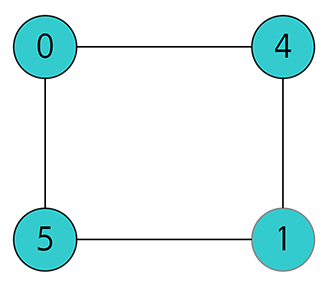

### Logical to physical qubit mapping:

| Logical qubit | Physical qubits |
|:---:|:---:|
| A | 0 and 4 |
| B | 1 |
| C | 5 |

### Physical qubit problem:
* Constraint 1: $x_4 \rightarrow x_1$
* Constraint 2: $x_0$ and $x_5$ disagree
* Constraint 3: $x_1$ and $x_5$ agree
* Constraint 4: $x_0$ and $x_4$ agree


In [19]:
# Create CSP from problem constraints
import dwavebinarycsp
csp = dwavebinarycsp.ConstraintSatisfactionProblem(dwavebinarycsp.BINARY)

# Constraint 1: x4 implies x1
def imply(a,b): # a implies b: True except when (a,b) is (True, False)
    return not(a and not b)
csp.add_constraint(imply, (4,1))

# Constraint 2: x0 and x5 disagree
csp.add_constraint({(1,0),(0,1)}, (0, 5))

# Constraint 3: x1 and x5 agree
csp.add_constraint({(1,1),(0,0)}, (1, 5))

# Constraint 4: x0 and x4 agree
csp.add_constraint({(1,1),(0,0)}, (0, 4))

csp.constraints

[Constraint.from_configurations(frozenset({(0, 1), (0, 0), (1, 1)}), (4, 1), Vartype.BINARY, name='Constraint'),
 Constraint.from_configurations(frozenset({(0, 1), (1, 0)}), (0, 5), Vartype.BINARY, name='Constraint'),
 Constraint.from_configurations(frozenset({(0, 0), (1, 1)}), (1, 5), Vartype.BINARY, name='Constraint'),
 Constraint.from_configurations(frozenset({(0, 0), (1, 1)}), (0, 4), Vartype.BINARY, name='Constraint')]

In [20]:
# Convert CSP to Binary Quadratic Model (BQM)
bqm = dwavebinarycsp.stitch(csp)
bqm.to_ising()

({4: 0.5, 1: -0.5, 0: 0.0, 5: 0.0},
 {(4, 1): -0.5, (4, 0): -1.0, (1, 5): -1.0, (0, 5): 1.0},
 0.5)

In [21]:
# Sample 100 times the BQM
from dwave.system.samplers import DWaveSampler
sampler = DWaveSampler()
res = sampler.sample(bqm, num_reads=100)
list(res.data())

[Sample(sample={0: 0, 1: 1, 4: 0, 5: 1}, energy=-3.0, num_occurrences=100)]

In [22]:
# Check if returned solution is valid
csp.check(res.first.sample)

True

# 3-bit 2-SAT example as a CSP with Embedding
Logical qubit problem:
* Constraint 1: $x_A \rightarrow x_B$
* Constraint 2: $x_A$ and $x_C$ disagree
* Constraint 3: $x_B$ and $x_C$ agree

In [24]:
# Create an embedding composite with a fixed map
from dwave.system.composites import FixedEmbeddingComposite
embedding = {'a':[0,4], 'b':[1], 'c':[5]}
embed_sampler = FixedEmbeddingComposite(sampler, embedding)

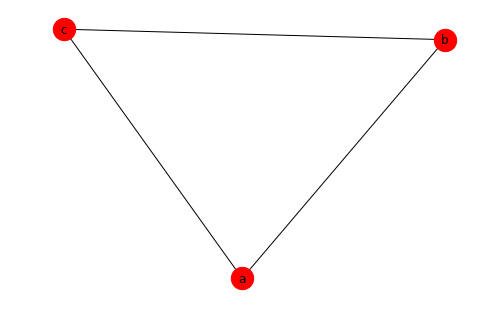

In [31]:
# Plot composite graph
import networkx as nx
g = nx.Graph()
g.add_nodes_from(embed_sampler.nodelist)
g.add_edges_from(embed_sampler.edgelist)
%matplotlib inline
nx.draw(g, node_size=500, with_labels=True)

In [32]:
# Create CSP from problem constraints
csp = dwavebinarycsp.ConstraintSatisfactionProblem(dwavebinarycsp.BINARY)

# Constraint 1: a implies b
def imply(a,b): # a implies b: True except when (a,b) is (True, False)
    return not(a and not b)
csp.add_constraint(imply, ('a','b'))

# Constraint 2: a and c disagree
csp.add_constraint({(1,0),(0,1)}, ('a', 'c'))

# Constraint 3: b and c agree
csp.add_constraint({(1,1),(0,0)}, ('b', 'c'))

csp.constraints

[Constraint.from_configurations(frozenset({(0, 1), (0, 0), (1, 1)}), ('a', 'b'), Vartype.BINARY, name='Constraint'),
 Constraint.from_configurations(frozenset({(0, 1), (1, 0)}), ('a', 'c'), Vartype.BINARY, name='Constraint'),
 Constraint.from_configurations(frozenset({(0, 0), (1, 1)}), ('b', 'c'), Vartype.BINARY, name='Constraint')]

In [37]:
# Convert CSP to Binary Quadratic Model (BQM)
bqm = dwavebinarycsp.stitch(csp)
bqm

BinaryQuadraticModel({'a': 0, 'b': 2, 'c': 0}, {('a', 'b'): -2, ('a', 'c'): 4, ('b', 'c'): -4}, 0.0, Vartype.BINARY)

In [38]:
# Sample 100 times the BQM
res = embed_sampler.sample(bqm, num_reads=100)
list(res.data())

[Sample(sample={'a': 0, 'b': 1, 'c': 1}, energy=-2.0, num_occurrences=100, chain_break_fraction=0.0)]

In [43]:
# Sample 100 times the BQM with chain strength=2
res = embed_sampler.sample(bqm, chain_strength=2, num_reads=100)
list(res.data())

[Sample(sample={'a': 0, 'b': 1, 'c': 1}, energy=-2.0, num_occurrences=99, chain_break_fraction=0.0),
 Sample(sample={'a': 1, 'b': 0, 'c': 0}, energy=0.0, num_occurrences=1, chain_break_fraction=0.0)]

## Automatic Embedding

In [44]:
# Create an automatic embedding composite
from dwave.system.composites import EmbeddingComposite
embed_sampler = EmbeddingComposite(sampler)

In [45]:
# Sample 100 times the BQM with chain strength=2
res = embed_sampler.sample(bqm, chain_strength=2, num_reads=100)
list(res.data())

[Sample(sample={'a': 0, 'b': 1, 'c': 1}, energy=-2.0, num_occurrences=99, chain_break_fraction=0.0),
 Sample(sample={'a': 1, 'b': 1, 'c': 0}, energy=0.0, num_occurrences=1, chain_break_fraction=0.0)]

# 3-bit 2-SAT example on local classical solvers

### Exact Solver

In [47]:
# Sample the BQM with Exact Solver: calculates the energy of all possible samples
import dimod
exact_solver = dimod.ExactSolver()
res = exact_solver.sample(bqm)
list(res.data())

[Sample(sample={'a': 0, 'b': 1, 'c': 1}, energy=-2.0, num_occurrences=1),
 Sample(sample={'a': 0, 'b': 0, 'c': 0}, energy=0.0, num_occurrences=1),
 Sample(sample={'a': 1, 'b': 0, 'c': 0}, energy=0.0, num_occurrences=1),
 Sample(sample={'a': 1, 'b': 1, 'c': 0}, energy=0.0, num_occurrences=1),
 Sample(sample={'a': 1, 'b': 1, 'c': 1}, energy=0.0, num_occurrences=1),
 Sample(sample={'a': 0, 'b': 0, 'c': 1}, energy=0.0, num_occurrences=1),
 Sample(sample={'a': 0, 'b': 1, 'c': 0}, energy=2.0, num_occurrences=1),
 Sample(sample={'a': 1, 'b': 0, 'c': 1}, energy=4.0, num_occurrences=1)]

In [48]:
# Check if returned solutions are valid
for s, energy, in res.data(['sample', 'energy']):
    print('Sample:', s, ' Energy:', energy, ' Valid:', csp.check(s))

Sample: {'a': 0, 'b': 1, 'c': 1}  Energy: -2.0  Valid: True
Sample: {'a': 0, 'b': 0, 'c': 0}  Energy: 0.0  Valid: False
Sample: {'a': 1, 'b': 0, 'c': 0}  Energy: 0.0  Valid: False
Sample: {'a': 1, 'b': 1, 'c': 0}  Energy: 0.0  Valid: False
Sample: {'a': 1, 'b': 1, 'c': 1}  Energy: 0.0  Valid: False
Sample: {'a': 0, 'b': 0, 'c': 1}  Energy: 0.0  Valid: False
Sample: {'a': 0, 'b': 1, 'c': 0}  Energy: 2.0  Valid: False
Sample: {'a': 1, 'b': 0, 'c': 1}  Energy: 4.0  Valid: False


### Simulated Annealing

In [49]:
# Sample the BQM 10 times with Simulated Annealing Sampler
sa_sampler = dimod.SimulatedAnnealingSampler()
res = sa_sampler.sample(bqm, num_reads=10)
list(res.data())

[Sample(sample={'a': 0, 'b': 1, 'c': 1}, energy=-2.0, num_occurrences=1),
 Sample(sample={'a': 0, 'b': 1, 'c': 1}, energy=-2.0, num_occurrences=1),
 Sample(sample={'a': 0, 'b': 1, 'c': 1}, energy=-2.0, num_occurrences=1),
 Sample(sample={'a': 0, 'b': 1, 'c': 1}, energy=-2.0, num_occurrences=1),
 Sample(sample={'a': 0, 'b': 1, 'c': 1}, energy=-2.0, num_occurrences=1),
 Sample(sample={'a': 0, 'b': 1, 'c': 1}, energy=-2.0, num_occurrences=1),
 Sample(sample={'a': 0, 'b': 1, 'c': 1}, energy=-2.0, num_occurrences=1),
 Sample(sample={'a': 0, 'b': 1, 'c': 1}, energy=-2.0, num_occurrences=1),
 Sample(sample={'a': 0, 'b': 1, 'c': 1}, energy=-2.0, num_occurrences=1),
 Sample(sample={'a': 0, 'b': 1, 'c': 1}, energy=-2.0, num_occurrences=1)]

### Random Sampler

In [50]:
# Sample the BQM 10 times with Random Sampler
rand_sampler = dimod.RandomSampler()
res = rand_sampler.sample(bqm, num_reads=10)
list(res.data())

[Sample(sample={'a': 0, 'b': 1, 'c': 1}, energy=-2.0, num_occurrences=1),
 Sample(sample={'a': 0, 'b': 1, 'c': 1}, energy=-2.0, num_occurrences=1),
 Sample(sample={'a': 1, 'b': 1, 'c': 1}, energy=0.0, num_occurrences=1),
 Sample(sample={'a': 1, 'b': 1, 'c': 1}, energy=0.0, num_occurrences=1),
 Sample(sample={'a': 0, 'b': 0, 'c': 0}, energy=0.0, num_occurrences=1),
 Sample(sample={'a': 1, 'b': 1, 'c': 0}, energy=0.0, num_occurrences=1),
 Sample(sample={'a': 1, 'b': 0, 'c': 0}, energy=0.0, num_occurrences=1),
 Sample(sample={'a': 1, 'b': 0, 'c': 1}, energy=4.0, num_occurrences=1),
 Sample(sample={'a': 1, 'b': 0, 'c': 1}, energy=4.0, num_occurrences=1),
 Sample(sample={'a': 1, 'b': 0, 'c': 1}, energy=4.0, num_occurrences=1)]

# Map Coloring Problem
* Constraint 1: On each region one and only one color out of a given set of colors must be assigned
* Constraint 2: Neighbouring regions must have distinct colors

### Problem: Four-color mapping of Canada regions
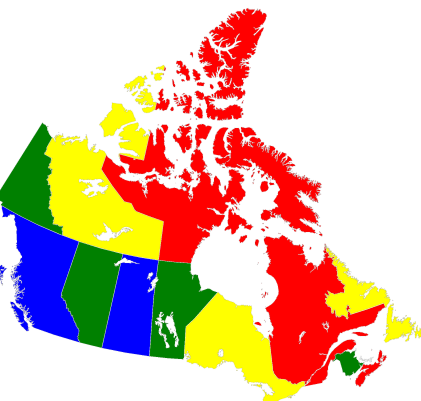

### Conectivity graph
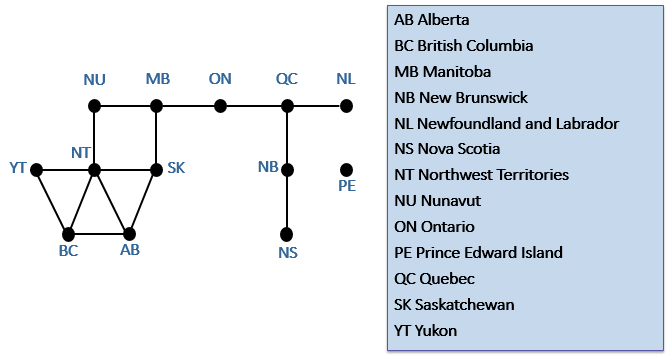

Because of constraint 2, it is easier to assign one logical qubit to each possible color on each region (unary encoding). For example, in Alberta we have four logical qubits: AB_r, AB_g, AB_b, AB_y

In [33]:
# Create a CSP for a single region

csp = dwavebinarycsp.ConstraintSatisfactionProblem(dwavebinarycsp.BINARY)

colors = ('r', 'g', 'b', 'y') # Red, Green, Blue, Yellow

# Valid configurations for the constraint that each region select a single color
one_color_configurations = {(0, 0, 0, 1), (0, 0, 1, 0), (0, 1, 0, 0), (1, 0, 0, 0)}

# Add constrant 1 for Alberta
variables = ['AB_'+c for c in colors]
csp.add_constraint(one_color_configurations, variables)

csp.constraints

[Constraint.from_configurations(frozenset({(0, 0, 1, 0), (0, 0, 0, 1), (1, 0, 0, 0), (0, 1, 0, 0)}), ('AB_r', 'AB_g', 'AB_b', 'AB_y'), Vartype.BINARY, name='Constraint')]

In [34]:
# Convert CSP to Binary Quadratic Model (BQM)

bqm = dwavebinarycsp.stitch(csp)
dict(bqm.quadratic)

{('AB_b', 'AB_g'): 4.0,
 ('AB_b', 'AB_r'): 4.0,
 ('AB_b', 'AB_y'): 4.0,
 ('AB_g', 'AB_r'): 4.0,
 ('AB_g', 'AB_y'): 4.0,
 ('AB_r', 'AB_y'): 4.0}

Since four qubits couple with all other qubits, the coupling graph is a 4-node complete graph ($K_4$). We could manually embed such graph in a single Chimera cell, assigning two physical qubits to each logical qubit:

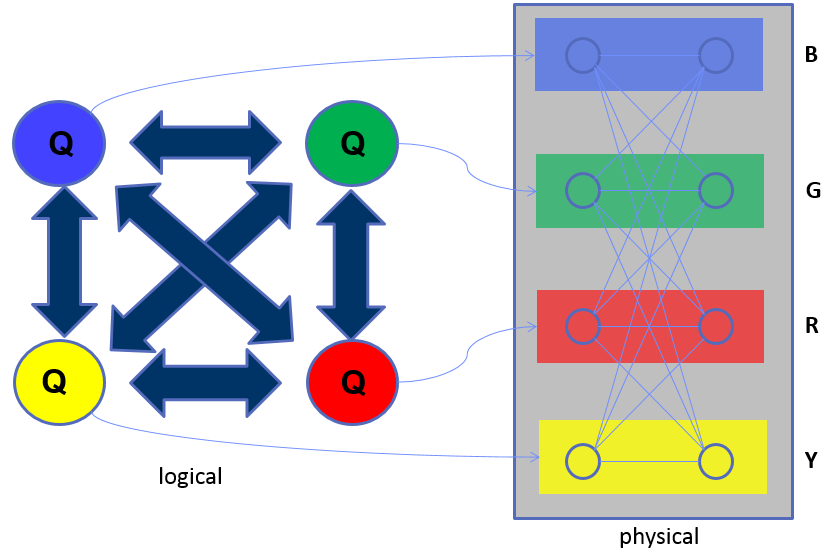

In [35]:
# Sample 100 times the BQM with chain strength=2

res = embed_sampler.sample(bqm, chain_strength=2, num_reads=100)
list(res.data())

[Sample(sample={'AB_b': 1, 'AB_g': 0, 'AB_r': 0, 'AB_y': 0}, energy=0.0, num_occurrences=30, chain_break_fraction=0.0),
 Sample(sample={'AB_b': 0, 'AB_g': 1, 'AB_r': 0, 'AB_y': 0}, energy=0.0, num_occurrences=25, chain_break_fraction=0.0),
 Sample(sample={'AB_b': 0, 'AB_g': 0, 'AB_r': 1, 'AB_y': 0}, energy=0.0, num_occurrences=19, chain_break_fraction=0.0),
 Sample(sample={'AB_b': 0, 'AB_g': 0, 'AB_r': 0, 'AB_y': 1}, energy=0.0, num_occurrences=25, chain_break_fraction=0.0),
 Sample(sample={'AB_b': 0, 'AB_g': 0, 'AB_r': 1, 'AB_y': 1}, energy=2.0, num_occurrences=1, chain_break_fraction=0.25)]

In [36]:
regions = ['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE',
             'QC', 'SK', 'YT']

# Create a CSP for the complete problem
csp = dwavebinarycsp.ConstraintSatisfactionProblem(dwavebinarycsp.BINARY)

# Add constraint 1 for each region
for region in regions:
    variables = [region+'_'+c for c in colors]
    csp.add_constraint(one_color_configurations, variables)

csp.constraints

[Constraint.from_configurations(frozenset({(0, 0, 1, 0), (0, 0, 0, 1), (1, 0, 0, 0), (0, 1, 0, 0)}), ('AB_r', 'AB_g', 'AB_b', 'AB_y'), Vartype.BINARY, name='Constraint'),
 Constraint.from_configurations(frozenset({(0, 0, 1, 0), (0, 0, 0, 1), (1, 0, 0, 0), (0, 1, 0, 0)}), ('BC_r', 'BC_g', 'BC_b', 'BC_y'), Vartype.BINARY, name='Constraint'),
 Constraint.from_configurations(frozenset({(0, 0, 1, 0), (0, 0, 0, 1), (1, 0, 0, 0), (0, 1, 0, 0)}), ('MB_r', 'MB_g', 'MB_b', 'MB_y'), Vartype.BINARY, name='Constraint'),
 Constraint.from_configurations(frozenset({(0, 0, 1, 0), (0, 0, 0, 1), (1, 0, 0, 0), (0, 1, 0, 0)}), ('NB_r', 'NB_g', 'NB_b', 'NB_y'), Vartype.BINARY, name='Constraint'),
 Constraint.from_configurations(frozenset({(0, 0, 1, 0), (0, 0, 0, 1), (1, 0, 0, 0), (0, 1, 0, 0)}), ('NL_r', 'NL_g', 'NL_b', 'NL_y'), Vartype.BINARY, name='Constraint'),
 Constraint.from_configurations(frozenset({(0, 0, 1, 0), (0, 0, 0, 1), (1, 0, 0, 0), (0, 1, 0, 0)}), ('NS_r', 'NS_g', 'NS_b', 'NS_y'), Vartype.BI

For constraint 2, we don't want neighbouring regions to have the same color, so we can penalize the couplings between qubits of the same color of neighbouring regions:

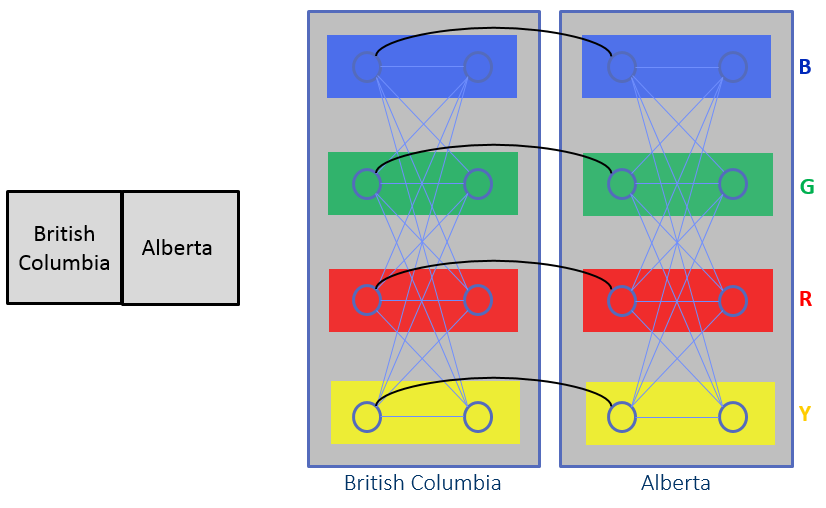

In [37]:
neighbors = [('AB', 'BC'), ('AB', 'NT'), ('AB', 'SK'), ('BC', 'NT'), ('BC', 'YT'),
             ('MB', 'NU'), ('MB', 'ON'), ('MB', 'SK'), ('NB', 'NS'), ('NB', 'QC'),
             ('NL', 'QC'), ('NT', 'NU'), ('NT', 'SK'), ('NT', 'YT'), ('ON', 'QC')]

# Function for constraint 2 between regions u and v
def not_both_1(u, v):
    return not (u and v)

# Add constraint 2 for each pair of neighboring regions

for u,v in neighbors:
    for c in colors:
        variables = [u+'_'+c, v+'_'+c]
        csp.add_constraint(not_both_1, variables)
        
csp.constraints

[Constraint.from_configurations(frozenset({(0, 0, 1, 0), (0, 0, 0, 1), (1, 0, 0, 0), (0, 1, 0, 0)}), ('AB_r', 'AB_g', 'AB_b', 'AB_y'), Vartype.BINARY, name='Constraint'),
 Constraint.from_configurations(frozenset({(0, 0, 1, 0), (0, 0, 0, 1), (1, 0, 0, 0), (0, 1, 0, 0)}), ('BC_r', 'BC_g', 'BC_b', 'BC_y'), Vartype.BINARY, name='Constraint'),
 Constraint.from_configurations(frozenset({(0, 0, 1, 0), (0, 0, 0, 1), (1, 0, 0, 0), (0, 1, 0, 0)}), ('MB_r', 'MB_g', 'MB_b', 'MB_y'), Vartype.BINARY, name='Constraint'),
 Constraint.from_configurations(frozenset({(0, 0, 1, 0), (0, 0, 0, 1), (1, 0, 0, 0), (0, 1, 0, 0)}), ('NB_r', 'NB_g', 'NB_b', 'NB_y'), Vartype.BINARY, name='Constraint'),
 Constraint.from_configurations(frozenset({(0, 0, 1, 0), (0, 0, 0, 1), (1, 0, 0, 0), (0, 1, 0, 0)}), ('NL_r', 'NL_g', 'NL_b', 'NL_y'), Vartype.BINARY, name='Constraint'),
 Constraint.from_configurations(frozenset({(0, 0, 1, 0), (0, 0, 0, 1), (1, 0, 0, 0), (0, 1, 0, 0)}), ('NS_r', 'NS_g', 'NS_b', 'NS_y'), Vartype.BI

In [38]:
# Convert CSP to Binary Quadratic Model (BQM)

bqm = dwavebinarycsp.stitch(csp)
dict(bqm.quadratic)

{('AB_b', 'AB_g'): 4.0,
 ('AB_b', 'AB_r'): 4.0,
 ('AB_b', 'AB_y'): 4.0,
 ('AB_b', 'BC_b'): 2,
 ('AB_b', 'NT_b'): 2,
 ('AB_b', 'SK_b'): 2,
 ('AB_g', 'AB_r'): 4.0,
 ('AB_g', 'AB_y'): 4.0,
 ('AB_g', 'BC_g'): 2,
 ('AB_g', 'NT_g'): 2,
 ('AB_g', 'SK_g'): 2,
 ('AB_r', 'AB_y'): 4.0,
 ('AB_r', 'BC_r'): 2,
 ('AB_r', 'NT_r'): 2,
 ('AB_r', 'SK_r'): 2,
 ('AB_y', 'BC_y'): 2,
 ('AB_y', 'NT_y'): 2,
 ('AB_y', 'SK_y'): 2,
 ('BC_b', 'BC_g'): 4.0,
 ('BC_b', 'BC_r'): 4.0,
 ('BC_b', 'BC_y'): 4.0,
 ('BC_b', 'NT_b'): 2,
 ('BC_b', 'YT_b'): 2,
 ('BC_g', 'BC_r'): 4.0,
 ('BC_g', 'BC_y'): 4.0,
 ('BC_g', 'NT_g'): 2,
 ('BC_g', 'YT_g'): 2,
 ('BC_r', 'BC_y'): 4.0,
 ('BC_r', 'NT_r'): 2,
 ('BC_r', 'YT_r'): 2,
 ('BC_y', 'NT_y'): 2,
 ('BC_y', 'YT_y'): 2,
 ('MB_b', 'MB_g'): 4.0,
 ('MB_b', 'MB_r'): 4.0,
 ('MB_b', 'MB_y'): 4.0,
 ('MB_b', 'NU_b'): 2,
 ('MB_b', 'ON_b'): 2,
 ('MB_b', 'SK_b'): 2,
 ('MB_g', 'MB_r'): 4.0,
 ('MB_g', 'MB_y'): 4.0,
 ('MB_g', 'NU_g'): 2,
 ('MB_g', 'ON_g'): 2,
 ('MB_g', 'SK_g'): 2,
 ('MB_r', 'MB_y'): 4

In [39]:
# Sample 100 times the BQM with chain strength=2

res = embed_sampler.sample(bqm, chain_strength=2, num_reads=100)
list(res.data())

[Sample(sample={'AB_b': 0, 'AB_g': 0, 'AB_r': 0, 'AB_y': 1, 'BC_b': 0, 'BC_g': 0, 'BC_r': 1, 'BC_y': 0, 'MB_b': 1, 'MB_g': 0, 'MB_r': 0, 'MB_y': 0, 'NB_b': 1, 'NB_g': 0, 'NB_r': 0, 'NB_y': 0, 'NL_b': 1, 'NL_g': 0, 'NL_r': 0, 'NL_y': 0, 'NS_b': 0, 'NS_g': 1, 'NS_r': 0, 'NS_y': 0, 'NT_b': 1, 'NT_g': 0, 'NT_r': 0, 'NT_y': 0, 'NU_b': 0, 'NU_g': 1, 'NU_r': 0, 'NU_y': 0, 'ON_b': 0, 'ON_g': 0, 'ON_r': 1, 'ON_y': 0, 'PE_b': 1, 'PE_g': 0, 'PE_r': 0, 'PE_y': 0, 'QC_b': 0, 'QC_g': 0, 'QC_r': 0, 'QC_y': 1, 'SK_b': 0, 'SK_g': 0, 'SK_r': 1, 'SK_y': 0, 'YT_b': 0, 'YT_g': 0, 'YT_r': 0, 'YT_y': 1}, energy=0.0, num_occurrences=1, chain_break_fraction=0.0),
 Sample(sample={'AB_b': 0, 'AB_g': 0, 'AB_r': 1, 'AB_y': 0, 'BC_b': 1, 'BC_g': 0, 'BC_r': 0, 'BC_y': 0, 'MB_b': 1, 'MB_g': 0, 'MB_r': 0, 'MB_y': 0, 'NB_b': 0, 'NB_g': 0, 'NB_r': 1, 'NB_y': 0, 'NL_b': 0, 'NL_g': 0, 'NL_r': 1, 'NL_y': 0, 'NS_b': 0, 'NS_g': 1, 'NS_r': 0, 'NS_y': 0, 'NT_b': 0, 'NT_g': 0, 'NT_r': 0, 'NT_y': 1, 'NU_b': 0, 'NU_g': 1, 'NU_r':

In [40]:
# Check if returned solutions are valid

for s, energy, n, cbf in res.data(['sample', 'energy', 'num_occurrences', 'chain_break_fraction']):
    print('Valid:', csp.check(s), ' Energy:', energy, ' Num. occurences:', n, ' Chain break fraction:', cbf)

Valid: True  Energy: 0.0  Num. occurences: 1  Chain break fraction: 0.0
Valid: True  Energy: 0.0  Num. occurences: 1  Chain break fraction: 0.0
Valid: True  Energy: 0.0  Num. occurences: 1  Chain break fraction: 0.0
Valid: True  Energy: 0.0  Num. occurences: 1  Chain break fraction: 0.0
Valid: True  Energy: 0.0  Num. occurences: 1  Chain break fraction: 0.0
Valid: True  Energy: 0.0  Num. occurences: 1  Chain break fraction: 0.0
Valid: True  Energy: 0.0  Num. occurences: 1  Chain break fraction: 0.0
Valid: True  Energy: 0.0  Num. occurences: 1  Chain break fraction: 0.0
Valid: True  Energy: 0.0  Num. occurences: 1  Chain break fraction: 0.0
Valid: True  Energy: 0.0  Num. occurences: 1  Chain break fraction: 0.0
Valid: True  Energy: 0.0  Num. occurences: 1  Chain break fraction: 0.0
Valid: True  Energy: 0.0  Num. occurences: 1  Chain break fraction: 0.0
Valid: True  Energy: 0.0  Num. occurences: 1  Chain break fraction: 0.0
Valid: True  Energy: 0.0  Num. occurences: 1  Chain break fracti

In [41]:
# Extract regions color from first solution

s = res.first.sample

map_color = {}

for r in regions:
    color = None
    for c in colors:
        if s[r+'_'+c]:
            if color is None:
                color = c
            else:
                color = None
                break
    if color is None:
        print('Invalid configuration for', r)
    else:
        map_color[r] = color

map_color

{'AB': 'y',
 'BC': 'r',
 'MB': 'b',
 'NB': 'b',
 'NL': 'b',
 'NS': 'g',
 'NT': 'b',
 'NU': 'g',
 'ON': 'r',
 'PE': 'b',
 'QC': 'y',
 'SK': 'r',
 'YT': 'y'}

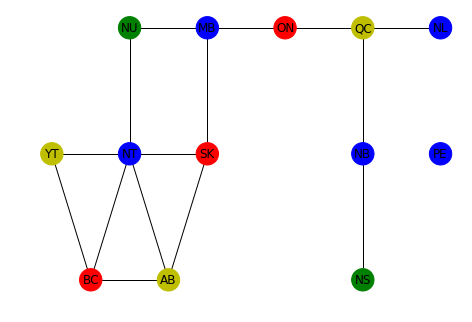

In [42]:
# Draw conectivity graph with region colors

pos = {'YT': (0,1), 'BC': (.5, 0), 'NT': (1,1), 'NU': (1,2), 'AB': (1.5,0), 'SK': (2,1), 'MB': (2,2), 'ON': (3,2),
       'NS': (4,0), 'NB': (4,1), 'QC': (4,2), 'PE': (5,1), 'NL': (5,2)}

g = nx.Graph()
g.add_nodes_from(regions)
g.add_edges_from(neighbors)
nx.draw(g, node_size=500, with_labels=True, pos=pos, node_color=[map_color[r] for r in regions])

# Factoring using a digital multiplier circuit


### Binary multiplication of 4-bit integers:
```
     1011   (multiplicand: 11 in binary)
   x 1110   (multiplier: 14 in binary)
   ======
     0000
    1011
   1011
+ 1011
=========
 10011010   (11*14=154 in binary)
```

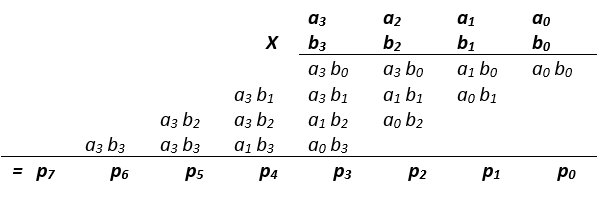

### Multiplier circuit:
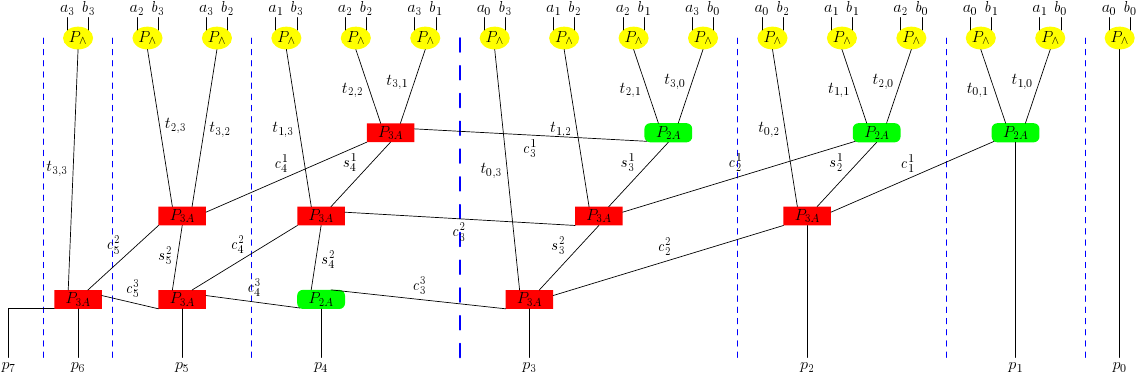

### Representation of the AND gate in CSP
Gate inputs X1,X2 and output Y = X1.X2 are all CSP variables which represent a valid or invalid combination:
```
X1 X2  Y  Valid/Invalid
0  0   0  Valid
0  1   0  Valid
1  0   0  Valid
1  1   1  Valid
0  0   1  Invalid
0  1   1  Invalid
1  0   1  Invalid
1  1   0  Invalid
```

In [43]:
# AND gate in CSP

dwavebinarycsp.factories.and_gate(('x1', 'x2', 'y'))

Constraint.from_configurations(frozenset({(1, 0, 0), (1, 1, 1), (0, 1, 0), (0, 0, 0)}), ('x1', 'x2', 'y'), Vartype.BINARY, name='AND')

### Multiplier circuit in CSP

In [44]:
csp = dwavebinarycsp.factories.multiplication_circuit(3)

print('Variables:', sorted(csp.variables.keys()))
csp.constraints

Variables: ['a0', 'a1', 'a2', 'and0,1', 'and0,2', 'and1,0', 'and1,1', 'and1,2', 'and2,0', 'and2,1', 'and2,2', 'b0', 'b1', 'b2', 'carry1,0', 'carry1,1', 'carry2,0', 'carry2,1', 'carry3,0', 'p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'sum1,1', 'sum2,1']


[Constraint.from_configurations(frozenset({(1, 0, 0), (1, 1, 1), (0, 1, 0), (0, 0, 0)}), ('a0', 'b0', 'p0'), Vartype.BINARY, name='AND(a0, b0) = p0'),
 Constraint.from_configurations(frozenset({(1, 0, 0), (1, 1, 1), (0, 1, 0), (0, 0, 0)}), ('a0', 'b1', 'and0,1'), Vartype.BINARY, name='AND(a0, b1) = and0,1'),
 Constraint.from_configurations(frozenset({(1, 0, 0), (1, 1, 1), (0, 1, 0), (0, 0, 0)}), ('a0', 'b2', 'and0,2'), Vartype.BINARY, name='AND(a0, b2) = and0,2'),
 Constraint.from_configurations(frozenset({(1, 0, 0), (1, 1, 1), (0, 1, 0), (0, 0, 0)}), ('a1', 'b0', 'and1,0'), Vartype.BINARY, name='AND(a1, b0) = and1,0'),
 Constraint.from_configurations(frozenset({(1, 1, 0, 1), (1, 0, 1, 0), (0, 0, 0, 0), (0, 1, 1, 0)}), ('and1,0', 'and0,1', 'p1', 'carry1,0'), Vartype.BINARY, name='HALFADDER(and1,0, and0,1) = p1, carry1,0'),
 Constraint.from_configurations(frozenset({(1, 0, 0), (1, 1, 1), (0, 1, 0), (0, 0, 0)}), ('a1', 'b1', 'and1,1'), Vartype.BINARY, name='AND(a1, b1) = and1,1'),
 Const

In [45]:
# Product to factorize: 35 = 5 * 7 = 100011 in binary

csp.fix_variable('p5', 1)
csp.fix_variable('p4', 0)
csp.fix_variable('p3', 0)
csp.fix_variable('p2', 0)
csp.fix_variable('p1', 1)
csp.fix_variable('p0', 1)

print('Variables:', sorted(csp.variables.keys()))

Variables: ['a0', 'a1', 'a2', 'and0,1', 'and0,2', 'and1,0', 'and1,1', 'and1,2', 'and2,0', 'and2,1', 'and2,2', 'b0', 'b1', 'b2', 'carry1,0', 'carry1,1', 'carry2,0', 'carry2,1', 'carry3,0', 'sum1,1', 'sum2,1']


In [46]:
 # Convert CSP to Binary Quadratic Model (BQM)

bqm = dwavebinarycsp.stitch(csp)
print('Linear terms:', len(bqm.linear))
print(bqm.linear)
print('Quadratic terms:', len(bqm.quadratic))
print(bqm.quadratic)

Linear terms: 24
{'a0': -2.0, 'b0': -2.0, 'and0,1': 4.0, 'b1': 0.0, 'and0,2': 8.0, 'b2': 0.0, 'a1': 0.0, 'and1,0': 4.0, 'carry1,0': 2.0, 'and1,1': 8.0, 'aux0': 8.0, 'carry1,1': 6.0, 'sum1,1': 0.0, 'and1,2': 8.0, 'a2': 0.0, 'and2,0': 4.0, 'aux1': -8.0, 'carry2,0': 4.0, 'and2,1': 8.0, 'aux2': 4.0, 'carry2,1': -2.0, 'sum2,1': 6.0, 'and2,2': 0.0, 'carry3,0': -2.0}
Quadratic terms: 68
{('a0', 'and0,1'): -4.0, ('a0', 'b1'): 2.0, ('a0', 'and0,2'): -4.0, ('a0', 'b2'): 2.0, ('b0', 'a1'): 2.0, ('b0', 'and1,0'): -4.0, ('b0', 'a2'): 2.0, ('b0', 'and2,0'): -4.0, ('and0,1', 'b1'): -4.0, ('and0,1', 'and1,0'): 4.0, ('and0,1', 'carry1,0'): -2.0, ('b1', 'a1'): 2.0, ('b1', 'and1,1'): -4.0, ('b1', 'a2'): 2.0, ('b1', 'and2,1'): -4.0, ('and0,2', 'b2'): -4.0, ('and0,2', 'and1,1'): 4.0, ('and0,2', 'aux0'): -4.0, ('and0,2', 'carry1,1'): -4.0, ('and0,2', 'sum1,1'): -4.0, ('b2', 'a1'): 2.0, ('b2', 'and1,2'): -4.0, ('b2', 'a2'): 2.0, ('b2', 'and2,2'): -4.0, ('a1', 'and1,0'): -4.0, ('a1', 'and1,1'): -4.0, ('a1', '

In [47]:
# Sample 500 times the BQM with chain strength=3

res = embed_sampler.sample(bqm, chain_strength=4, num_reads=500)
list(res.data())

[Sample(sample={'a0': 1, 'a1': 0, 'a2': 1, 'and0,1': 1, 'and0,2': 1, 'and1,0': 0, 'and1,1': 0, 'and1,2': 0, 'and2,0': 1, 'and2,1': 1, 'and2,2': 1, 'aux0': 0, 'aux1': 0, 'aux2': 1, 'b0': 1, 'b1': 1, 'b2': 1, 'carry1,0': 0, 'carry1,1': 0, 'carry2,0': 1, 'carry2,1': 0, 'carry3,0': 1, 'sum1,1': 1, 'sum2,1': 1}, energy=-2.0, num_occurrences=48, chain_break_fraction=0.0),
 Sample(sample={'a0': 1, 'a1': 1, 'a2': 1, 'and0,1': 0, 'and0,2': 1, 'and1,0': 1, 'and1,1': 0, 'and1,2': 1, 'and2,0': 1, 'and2,1': 0, 'and2,2': 1, 'aux0': 0, 'aux1': 0, 'aux2': 0, 'b0': 1, 'b1': 0, 'b2': 1, 'carry1,0': 0, 'carry1,1': 0, 'carry2,0': 1, 'carry2,1': 0, 'carry3,0': 1, 'sum1,1': 1, 'sum2,1': 1}, energy=-2.0, num_occurrences=37, chain_break_fraction=0.0),
 Sample(sample={'a0': 1, 'a1': 1, 'a2': 1, 'and0,1': 0, 'and0,2': 1, 'and1,0': 1, 'and1,1': 0, 'and1,2': 1, 'and2,0': 1, 'and2,1': 0, 'and2,2': 1, 'aux0': 0, 'aux1': 0, 'aux2': 0, 'b0': 1, 'b1': 0, 'b2': 1, 'carry1,0': 0, 'carry1,1': 0, 'carry2,0': 1, 'carry2,1'

In [48]:
# Extract A and B from returned solutions and check if solutions are valid

a = ('a2', 'a1', 'a0')
b = ('b2', 'b1', 'b0')
for s, energy, n, cbf in res.data(['sample', 'energy', 'num_occurrences', 'chain_break_fraction']):
    print('A:', tuple(s[ax] for ax in a), ' B:', tuple(s[bx] for bx in b),
          ' Energy:', energy, ' Valid:', csp.check(s), ' Num. occurences:', n, ' Chain break fraction:', cbf)


A: (1, 0, 1)  B: (1, 1, 1)  Energy: -2.0  Valid: True  Num. occurences: 48  Chain break fraction: 0.0
A: (1, 1, 1)  B: (1, 0, 1)  Energy: -2.0  Valid: True  Num. occurences: 37  Chain break fraction: 0.0
A: (1, 1, 1)  B: (1, 0, 1)  Energy: -2.0  Valid: True  Num. occurences: 1  Chain break fraction: 0.041666666666666664
A: (1, 1, 1)  B: (1, 0, 1)  Energy: 2.0  Valid: False  Num. occurences: 1  Chain break fraction: 0.0
A: (1, 0, 1)  B: (0, 1, 1)  Energy: 2.0  Valid: False  Num. occurences: 2  Chain break fraction: 0.0
A: (0, 1, 1)  B: (1, 0, 1)  Energy: 2.0  Valid: False  Num. occurences: 2  Chain break fraction: 0.0
A: (1, 0, 1)  B: (1, 0, 1)  Energy: 2.0  Valid: False  Num. occurences: 1  Chain break fraction: 0.0
A: (1, 0, 1)  B: (1, 1, 1)  Energy: 2.0  Valid: False  Num. occurences: 1  Chain break fraction: 0.0
A: (1, 0, 1)  B: (1, 1, 1)  Energy: 2.0  Valid: False  Num. occurences: 1  Chain break fraction: 0.0
A: (0, 1, 1)  B: (1, 0, 1)  Energy: 2.0  Valid: False  Num. occurences: 

A: (1, 1, 1)  B: (1, 1, 1)  Energy: 4.0  Valid: False  Num. occurences: 1  Chain break fraction: 0.0
A: (1, 0, 0)  B: (1, 1, 1)  Energy: 4.0  Valid: False  Num. occurences: 1  Chain break fraction: 0.0
A: (1, 1, 1)  B: (1, 1, 1)  Energy: 4.0  Valid: False  Num. occurences: 1  Chain break fraction: 0.0
A: (1, 1, 0)  B: (0, 1, 1)  Energy: 4.0  Valid: False  Num. occurences: 1  Chain break fraction: 0.0
A: (1, 1, 1)  B: (0, 1, 1)  Energy: 4.0  Valid: False  Num. occurences: 1  Chain break fraction: 0.0
A: (1, 1, 0)  B: (1, 1, 1)  Energy: 4.0  Valid: False  Num. occurences: 1  Chain break fraction: 0.0
A: (1, 0, 1)  B: (0, 1, 1)  Energy: 4.0  Valid: False  Num. occurences: 2  Chain break fraction: 0.0
A: (1, 1, 0)  B: (1, 1, 1)  Energy: 4.0  Valid: False  Num. occurences: 1  Chain break fraction: 0.0
A: (1, 1, 0)  B: (0, 0, 1)  Energy: 6.0  Valid: False  Num. occurences: 1  Chain break fraction: 0.0
A: (1, 1, 1)  B: (0, 1, 1)  Energy: 6.0  Valid: False  Num. occurences: 2  Chain break frac

# General binary optimization with linear constraints

The goal is to find the optimal solution $\mathbf{x}^*$ :

$$\mathbf{x}^* = \underset{\mathbf{x}}{\arg \min} f(\mathbf{x})$$

subject to:

$$\mathbf{Cx} = \mathbf{c} \\
\mathbf{Dx} \leq \mathbf{d}$$

where:

$x_i \in \{0,1\}$ &nbsp; &nbsp; with $i=1,\ldots,n$

$f(\mathbf{x})$ is a pseudo-Boolean function ($\mathbb{B}^n \rightarrow \mathbb{R}$). It can *always* be expressed as a multi-linear polynomial:

$$f(\mathbf{x}) = a + \sum_{1\leq i\leq n} a_i x_i + \sum_{1\leq i<j\leq n} a_{ij} x_i x_j + \sum_{1\leq i<j<k\leq n} a_{ijk} x_i x_j x_k + \cdots \\ a,a_i,a_{ij},a_{ijk},\ldots \in \mathbb{R}$$

$\mathbf{C}$ is an $m \times n$ matrix and $\mathbf{c}$ an $m \times 1$ vector expressing $m$ linear equality constraints

$\mathbf{D}$ is an $l \times n$ matrix and $\mathbf{d}$ an $l \times 1$ vector expressing $l$ linear inequality constraints

**Any discrete (or combinatorial) optimization problem (like Integer Programming) can be expressed as a binary optimization problem.**

### Polynomial reduction to quadratic
#### Reduction by substitution

Using the AND gate constraint penalty, an ancilliary variable $z \Leftrightarrow x_1 x_2$ is added :

$P_{AND}(x_1,x_2;z) = x_1 x_2 -2x_1 z -2x_2 z + 3z$

The term $a_{123} x_1 x_2 x_3$ is then reduced to $a_{123} z x_3$ :

$a_{123} x_1 x_2 x_3 = \min_z\left(a_{123} z x_3 + W P_{AND}(x_1,x_2;z)\right)$ &nbsp; &nbsp; with $W \geq 1$

For higher-degree terms this reduction is repeated (with more ancilliary variables).

#### Reduction by minimum selection

Using this reduction there is no penalty weight parameter.

If $a_{123} < 0$ : &nbsp; &nbsp; $a_{123} x_1 x_2 x_3 = a_{123} z(x_1 + x_2 + x_3 - 2)$

If $a_{123} > 0$ : &nbsp; &nbsp; $a_{123} x_1 x_2 x_3 = a_{123} \{z(x_1 + x_2 + x_3 - 1) +
x_1x_2 + x_2x_3 + x_3x_1 - x_1 - x_2 - x_3 + 1\}$

### Linear equality constraints

The penalty for violating $\mathbf{Cx} - \mathbf{c} = 0$ is :

$P_=(\mathbf{x}) = W\|\mathbf{Cx} - \mathbf{c}\|^2$

or, for constraints with distinct weights :

$$P_=(\mathbf{x}) = \sum_{k=1}^m w_k^= \left( \langle \mathbf{C}_k, \mathbf{x} \rangle - c_k\right)^2$$

where $w_k^= > 0$ is the weight of equality constraint $k$ and $\mathbf{C}_k$ is the row $k$ of $\mathbf{C}$.

### Linear inequality constraints

Inequality constraints can be transformed into equality constraints by introducing non-negative slack variables $y_i \geq 0$ &nbsp; ($i=1,\ldots,l$) :

$\mathbf{Dx} \leq \mathbf{d} \Longleftrightarrow \mathbf{Dx} + \mathbf{y} = \mathbf{d}$ 

Since $\mathbf{y} \leq \mathbf{d} - \mathbf{Dx}$, the maximum value that each slack variable can take is :
$$y_i^\mathrm{max} = d_i - \min_\mathbf{x} \langle \mathbf{D}_i, \mathbf{x} \rangle = d_i - \sum_{j=1}^n \min(D_{ij},0)$$

Each slack variable $y_i$ can be represented by a pseudo-Boolean function $g_i(\mathbf{a}_i)$ where $\mathbf{a}_i$ is the vector of the ancilliary variables needed to enumerate all possible values of $y_i$. For example, if $y_i$ may take any integer value from 0 to $y_i^\mathrm{max}$, there are $y_i^\mathrm{max} + 1$ possible distinct values. Then, the number of ancilliary variables needed to represent $y_i$ is $|\mathbf{a}_i| = \lceil \log_2(y_i^\mathrm{max} + 1) \rceil$ and $y_i = g_i(\mathbf{a}_i) = \sum_{j=1}^{|\mathbf{a}_i|} 2^{j-1}a_{i,j}$.

The penalty for violating $\mathbf{Dx} + \mathbf{y} - \mathbf{d} = 0$ is :

$$P_\leq(\mathbf{x},\mathbf{a}) = \sum_{k=1}^l w_k^\leq \left( \langle \mathbf{D}_k, \mathbf{x} \rangle + g_i(\mathbf{a}_i) - d_k\right)^2$$

where $\mathbf{a}$ is the vector collecting all slack variables, $w_k^\leq > 0$ is the weight of inequality constraint $k$ and $\mathbf{D}_k$ is the row $k$ of $\mathbf{D}$.